<a href="https://colab.research.google.com/github/SaPahlavani/Exercise.Vision/blob/main/4_linear_brightness_and_contrast_adjustment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تنظیم روشنایی و کنتراست(با توابع خطی)</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در نوت‌بوک قبلی عملیات ریاضی روی تصویر و تاثیر جمع و تفریق کردن یک مقدار روی تصویر را روی نور یا brightness را مشاهده کردید.
</div>

[08-Arithmetic-Operations.ipynb](https://colab.research.google.com/drive/1J23m99p33a15Xg52XKpiPxbwwdZYRiMS?usp=sharing)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
حال علاوه بر روشنایی (brightness)، تضاد تصویر یا کنتراست(contrast) را بررسی خواهیم کرد و مشکلات این روش خطی بیان خواهد شد!</div>

$$g(x) = \alpha f(x) + \beta$$
$$\alpha > 0$$

The parameters α and β are often called the gain and bias parameters.
sometimes these parameters are said to control contrast and brightness respectively.

### do it with `convertScaleAbs()` function

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/drive/MyDrive/images/input (1).jpg")


* Enter the alpha value [0.1-3.0]: 2
* Enter the beta value [0-100]: 100


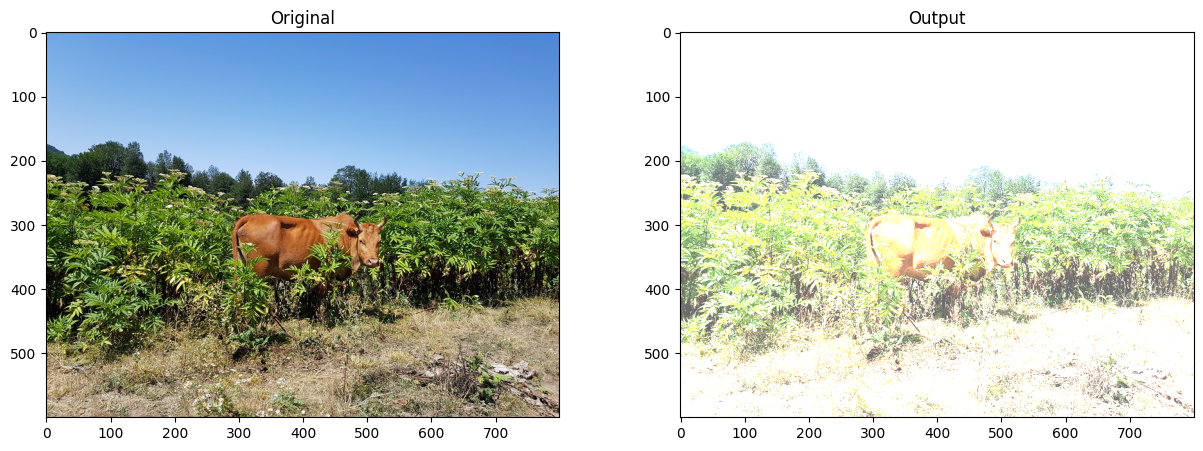

In [21]:
new_image = np.zeros(image.shape, image.dtype)

alpha = float(input('* Enter the alpha value [0.1-3.0]: '))
beta = int(input('* Enter the beta value [0-100]: '))

new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)


plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(new_image[...,::-1]);plt.title("Output");


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div style="direction:rtl;text-align:right;font-family:Tahoma">
قاعدتاً این عملیات را میتوانیم روی تک تک پیکسل ها یا سطر و ستون ها فرض کنیم که با فرض i شماره سطر و j شماره تون خواهیم داشت:</div>

$$g(i,j) = \alpha \cdot f(i,j) + \beta$$

* Enter the alpha value [0.1-3.0]: 0.5
* Enter the beta value [0-100]: 20


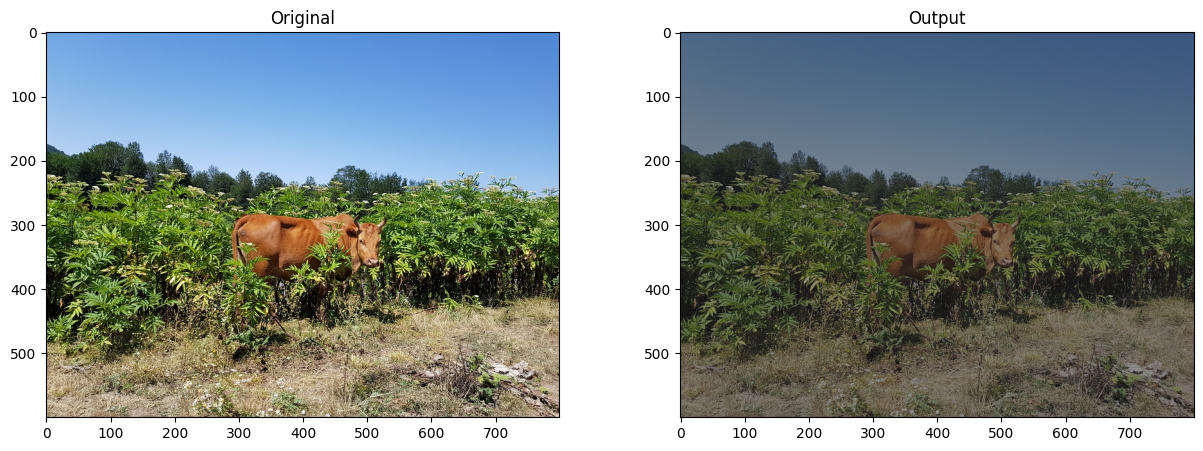

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/drive/MyDrive/images/input (1).jpg")

new_image2 = np.zeros(image.shape, image.dtype)

alpha = float(input('* Enter the alpha value [0.1-3.0]: '))
beta = int(input('* Enter the beta value [0-100]: '))

# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image2[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)


plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(new_image2[...,::-1]);plt.title("Output");



# Histogram analysis

In [23]:
gray_image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
gray_new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2GRAY)

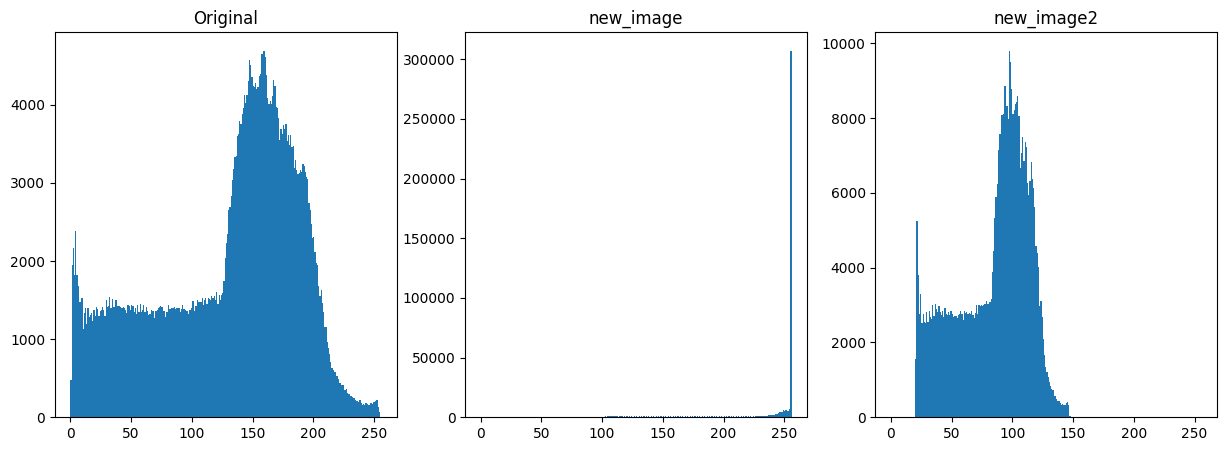

In [24]:
plt.figure(figsize=[15,5])
plt.subplot(131);plt.hist(gray_image.ravel(),256,[0,256]);plt.title("Original");
plt.subplot(132);plt.hist(gray_new_image.ravel(),256,[0,256]);plt.title("new_image");
plt.subplot(133);plt.hist(gray_new_image2.ravel(),256,[0,256]);plt.title("new_image2");


Source: https://docs.opencv.org/4.6.0/d3/dc1/tutorial_basic_linear_transform.html

تصحیح یک تصویر کم نور یا underexposed image

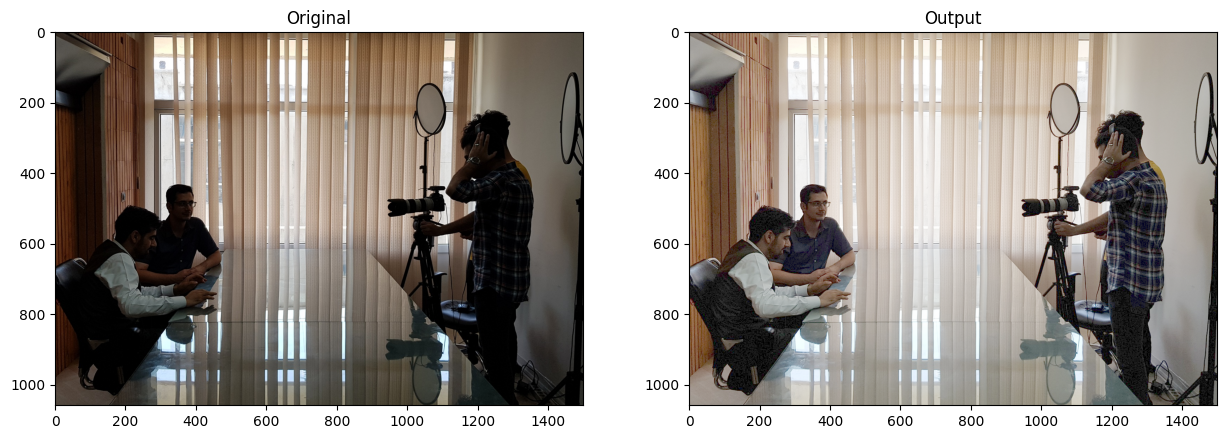

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.4

img_original = cv2.imread("/content/drive/MyDrive/images/room-light.jpg")
lookUpTable = np.empty((1,256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
out = cv2.LUT(img_original, lookUpTable)


plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(img_original[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(out[...,::-1]);plt.title("Output");

مقایسه این روش با روش قبل

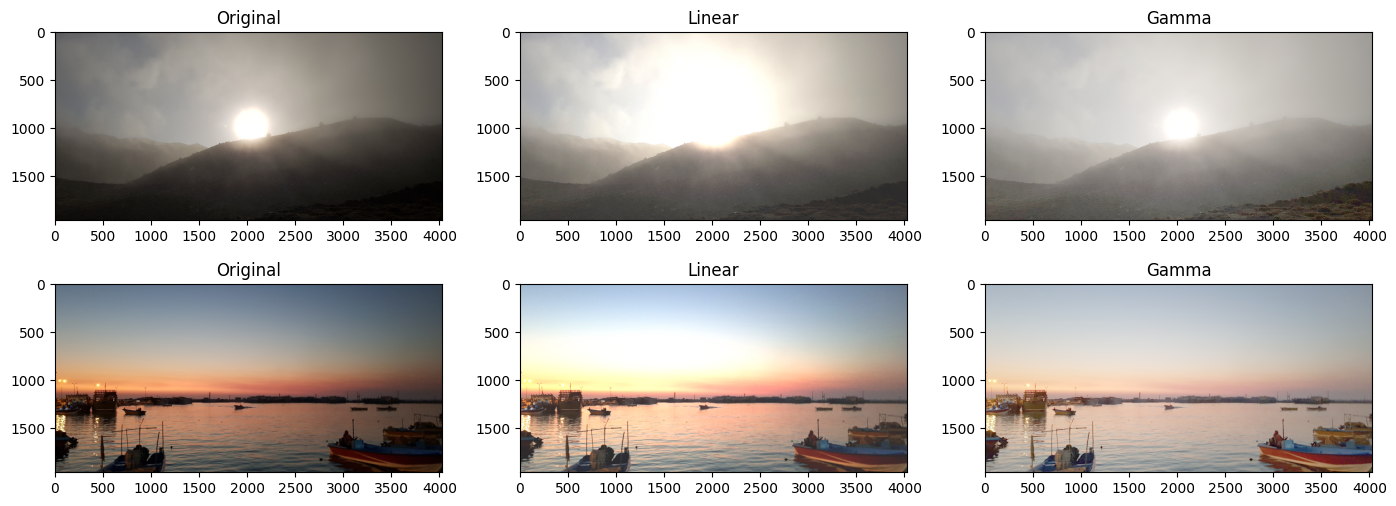

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.4

img_original1 = cv2.imread("/content/drive/MyDrive/images/aa.jpg")
img_original2 = cv2.imread("/content/drive/MyDrive/images/asalooye.jpg")
output_linear1 = cv2.convertScaleAbs(img_original1, alpha=1.3, beta=40)
output_linear2 = cv2.convertScaleAbs(img_original2, alpha=1.3, beta=40)

lookUpTable = np.empty((1,256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

output_gammacorrected1 = cv2.LUT(img_original1, lookUpTable)
output_gammacorrected2 = cv2.LUT(img_original2, lookUpTable)


plt.figure(figsize=[17,6])
plt.subplot(231);plt.imshow(img_original1[...,::-1]);plt.title("Original");
plt.subplot(232);plt.imshow(output_linear1[...,::-1]);plt.title("Linear");
plt.subplot(233);plt.imshow(output_gammacorrected1[...,::-1]);plt.title("Gamma");

plt.subplot(234);plt.imshow(img_original2[...,::-1]);plt.title("Original");
plt.subplot(235);plt.imshow(output_linear2[...,::-1]);plt.title("Linear");
plt.subplot(236);plt.imshow(output_gammacorrected2[...,::-1]);plt.title("Gamma");



#exercise

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

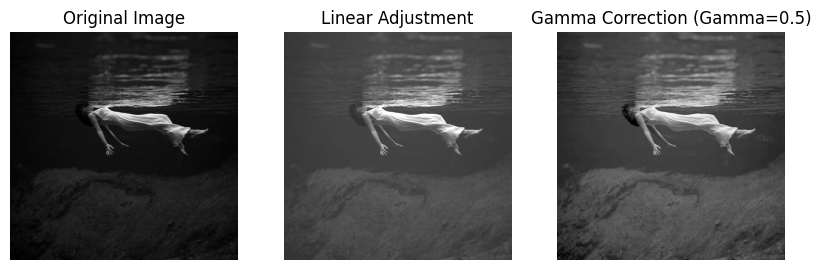

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری تصویر
image = cv2.imread("/content/drive/MyDrive/Ext/E1.jpg")

# تبدیل تصویر از BGR به RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# روش خطی: اضافه کردن یک مقدار ثابت به پیکسل‌ها
M = np.ones(image_rgb.shape, dtype="uint8") * 50  # مقدار ثابت 50
image_linear = cv2.add(image_rgb, M)

# روش اصلاح گاما: گامای کوچک‌تر از 1 برای روشن‌تر کردن تصویر
gamma = 0.5  # گامای کوچکتر از 1
image_gamma = np.uint8(255 * (image_rgb / 255) ** gamma)

# نمایش تصاویر
plt.figure(figsize=(10,10))

# نمایش تصویر اصلی
plt.subplot(131)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# نمایش تصویر روشن شده با روش خطی
plt.subplot(132)
plt.imshow(image_linear)
plt.title("Linear Adjustment")
plt.axis('off')

# نمایش تصویر روشن شده با روش اصلاح گاما
plt.subplot(133)
plt.imshow(image_gamma)
plt.title("Gamma Correction (Gamma=0.5)")
plt.axis('off')

plt.show()


با توجه به اینکه تصویر خیلی تاریک است سعی کنید آن را یکبار با روش خطی و یکبار با روش اصلاح گاما روشن‌تر کنید.

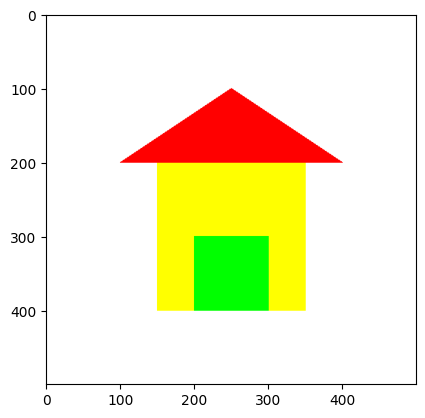

In [58]:
import cv2
import numpy as np

# ایجاد تصویر سفید
img = np.ones((500, 500, 3), dtype=np.uint8) * 255

# رسم مستطیل (بدنه خانه)
# پارامترها: تصویر، نقطه شروع، نقطه انتهایی، رنگ، ضخامت خط
cv2.rectangle(img, (150, 200), (350, 400), (0, 255, 255), -1)  # رنگ زرد
cv2.rectangle(img, (300, 400), (200, 300), (0, 255, 0), -1)  # رنگ زرد

# رسم مثلث (سقف خانه)
# ایجاد مختصات سه گوشه مثلث
points = np.array([[100, 200], [250, 100], [400, 200]], np.int32)
# رسم مثلث با استفاده از خطوط
cv2.fillPoly(img, [points], (0, 0, 255))  # رنگ قرمز

# نمایش تصویر
plt.imshow(img[:,:,::-1])


